# Supermarket Sales Analysis

![Supermarket Sales Prediction](https://d3fwccq2bzlel7.cloudfront.net/Pictures/480xAny/9/2/9/84929_supermarkettrolley_403077.jpeg)

## Project Overview

This project aims to develop a predictive model for supermarket sales based on historical data from three branches over a three-month period. By leveraging advanced time series analysis and machine learning techniques, we seek to forecast future sales trends and identify peak sales periods.

## Done by: Sihle Kalolo

## Problem Statement

In the highly competitive retail industry, accurate sales forecasting is crucial for effective inventory management, staff scheduling, and strategic decision-making. Our challenge is to create a robust predictive model that can:

1. Forecast daily sales with high accuracy
2. Identify patterns and trends in sales data
3. Predict peak sales periods
4. Provide actionable insights for business optimization

## Dataset

Our analysis is based on a time series dataset containing daily sales information from January 1, 2019, to March 30, 2019. Key features include:

- Date
- Daily sales figures
- Number of transactions per day
- Day of the week
- Month

## Objectives

1. Develop a time series model to predict daily sales
2. Identify factors influencing sales patterns
3. Create visualizations to represent sales trends and forecasts
4. Provide recommendations for inventory management and marketing strategies

## Methodology

We will employ a step-by-step approach, including:

1. Data preprocessing and exploratory data analysis
2. Time series decomposition
3. Feature engineering
4. Model selection and training
5. Model evaluation and fine-tuning
6. Forecasting and interpretation of results

## Expected Outcomes

- Identification of seasonal trends and patterns
- Insights into factors affecting sales performance
- Actionable recommendations for business strategy

By successfully addressing this problem, we aim to provide valuable insights that can drive informed decision-making and optimize business operations in the competitive supermarket industry.

## Step 1: Data Import and Loading

For this project, we'll be using the time-based analysis dataset located in the `data` directory. The dataset contains daily sales information and other relevant features for our supermarket sales prediction model.

### Steps:
1. Import necessary libraries
2. Load the dataset from CSV file
3. Display basic information about the dataset
4. Show the first few rows of the data

Let's proceed with loading our data:

In [67]:
# Import necessary libraries
import pandas as pd

# Load the dataset
time_based_analysis_df = pd.read_csv('time_based_analysis.csv')

# Display basic information about the dataset
print("Basic Information about the Dataset:")
time_based_analysis_df.info()  

# Show the first few rows of the data
print("\nFirst Few Rows of the Data:")
print(time_based_analysis_df.head())

# Display basic statistics of the dataset
print("\nBasic Statistics of the Dataset:")
print(time_based_analysis_df.describe())


Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              89 non-null     object 
 1   day               89 non-null     int64  
 2   month             89 non-null     int64  
 3   year              89 non-null     int64  
 4   daily_sales       89 non-null     float64
 5   num_transactions  89 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 4.3+ KB

First Few Rows of the Data:
         date  day  month  year  daily_sales  num_transactions
0  2019-01-01    1      1  2019      4745.18                12
1  2019-01-02    2      1  2019      1945.50                 8
2  2019-01-03    3      1  2019      2078.13                 8
3  2019-01-04    4      1  2019      1623.69                 6
4  2019-01-05    5      1  2019      3536.68                12

Basic Statistic

## Data Loading and Initial Insights

### Dataset Overview
- Records: 89 entries
- Period: 2019-01-01 to 2019-03-30 (3 months)
- Features: date, day, month, year, daily_sales (in Rands/ZAR), num_transactions

### Key Observations
1. Sales Distribution: 
   - Mean daily sales: R3,628.84
   - Range: R934.24 to R7,474.05
2. Transactions:
   - Average daily transactions: 11
   - Range: 6 to 20 transactions per day
3. Data Completeness: No missing values observed initially

### Data Quality
- Date format: Stored as 'object', needs conversion to datetime
- All other datatypes appropriate (int64 for day, month, year, num_transactions; float64 for daily_sales)

<div style="background-color: #FFCCCC; border: 2px solid #FF0000; padding: 10px; margin: 10px 0;">
<strong style="color: #FF0000;">⚠️ WARNING:</strong>
<p style="margin: 5px 0;">Before proceeding with data cleaning, create a copy of the original dataframe:</p>
<pre><code>time_based_analysis_df_copy = time_based_analysis_df.copy()</code></pre>
<p style="margin: 5px 0;">This ensures the original data remains intact for reference.</p>
</div>

### Steps 2: Data Cleaning
1. Data Type Conversion:
   - Convert 'date' column to datetime type
2. Missing Values:
   - Double-check for any missing values using multiple methods
   - Decide on appropriate handling strategy if any are found
3. Duplicate Entries:
   - Check for and handle any duplicate records
4. Outliers:
   - Identify potential outliers in 'daily_sales' and 'num_transactions'
   - Investigate these outliers and decide on treatment (e.g., keep, remove, or adjust)
5. Consistency Checks:
   - Ensure 'day', 'month', and 'year' values are consistent with 'date'
6. Feature Engineering:
   - Consider adding day of week as a new feature
7. Feature Engineering:
   - Consider adding day of week as a new feature

These cleaning steps will prepare our dataset for in-depth analysis and model development.

In [15]:
# Step 2: Data Cleaning

time_based_analysis_df_copy = time_based_analysis_df.copy()

# Data Type Conversion
# Convert 'date' column to datetime type
time_based_analysis_df_copy['date'] = pd.to_datetime(time_based_analysis_df_copy['date'], errors='coerce')

# Missing Values
# Double-check for any missing values using multiple methods
missing_values = time_based_analysis_df_copy.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Duplicate Entries
# Check for and handle any duplicate records
duplicates = time_based_analysis_df_copy.duplicated().sum()
print(f"\nNumber of Duplicate Records: {duplicates}")


# Outliers
# Identify potential outliers in 'daily_sales' and 'num_transactions'
print("\nDescriptive Statistics for 'daily_sales' and 'num_transactions':")
print(time_based_analysis_df_copy[['daily_sales', 'num_transactions']].describe())

Missing Values in Each Column:
date                0
day                 0
month               0
year                0
daily_sales         0
num_transactions    0
dtype: int64

Number of Duplicate Records: 0

Descriptive Statistics for 'daily_sales' and 'num_transactions':
       daily_sales  num_transactions
count    89.000000         89.000000
mean   3628.840000         11.235955
std    1527.639577          3.381173
min     934.240000          6.000000
25%    2444.540000          9.000000
50%    3163.230000         11.000000
75%    4745.180000         13.000000
max    7474.050000         20.000000


# Summary of Data Cleaning Results:

### 1. Missing Values:
- No missing values were detected in the dataset.

### 2. Duplicate Records:
- No duplicate records were found.

### 3. Descriptive Statistics:
- **`daily_sales`**: The values range from R934.24 to R7474.05, with a mean of R3628.84.
- **`num_transactions`**: The values range from 6 to 20, with a mean of 11.24.

Based on these statistics, the values seem reasonable, and no extreme outliers are present.


In [69]:
# Consistency Checks

# Ensure 'day', 'month', and 'year' values are consistent with 'date'
# Create new columns for day, month, and year extracted from the 'date' column
time_based_analysis_df_copy['extracted_day'] = time_based_analysis_df_copy['date'].dt.day
time_based_analysis_df_copy['extracted_month'] = time_based_analysis_df_copy['date'].dt.month
time_based_analysis_df_copy['extracted_year'] = time_based_analysis_df_copy['date'].dt.year

# Check for any inconsistencies between 'day', 'month', 'year' and the 'date' column
inconsistent_dates = time_based_analysis_df_copy[(time_based_analysis_df_copy['day'] != time_based_analysis_df_copy['extracted_day']) | 
                        (time_based_analysis_df_copy['month'] != time_based_analysis_df_copy['extracted_month']) | 
                        (time_based_analysis_df_copy['year'] != time_based_analysis_df_copy['extracted_year'])]

if len(inconsistent_dates) > 0:
    print(f"Inconsistent date records found: {len(inconsistent_dates)}")
    print(inconsistent_dates[['date', 'day', 'month', 'year', 'extracted_day', 'extracted_month', 'extracted_year']])
else:
    print("All 'day', 'month', and 'year' values are consistent with the 'date' column.")

# Drop the extracted columns as they were only for validation
time_based_analysis_df_copy.drop(columns=['extracted_day', 'extracted_month', 'extracted_year'], inplace=True)

# Feature Engineering
# Add a new feature for 'day of the week'
time_based_analysis_df_copy['day_of_week'] = time_based_analysis_df_copy['date'].dt.day_name()

# Check the first few rows to confirm the new feature
print("\nFirst few rows with 'day_of_week' feature:")
print(time_based_analysis_df_copy[['date', 'day_of_week', 'daily_sales', 'num_transactions']].head())


All 'day', 'month', and 'year' values are consistent with the 'date' column.

First few rows with 'day_of_week' feature:
        date day_of_week  daily_sales  num_transactions
0 2019-01-01     Tuesday     0.582729          0.428571
1 2019-01-02   Wednesday     0.154631          0.142857
2 2019-01-03    Thursday     0.174912          0.142857
3 2019-01-04      Friday     0.105424          0.000000
4 2019-01-05    Saturday     0.397938          0.428571


### Steps 3: Exploratory Data Analysis (EDA)

1. **Summary Statistics and Distribution Analysis**:
   - Display summary statistics for `daily_sales` to understand data spread.
   - Plot the distribution of `daily_sales` to visualize the spread and identify patterns.

2. **Time-Based Analysis**:
   - Aggregate and visualize average sales by `day_of_week` to identify any specific weekdays with higher sales.
   - Aggregate and plot average sales by `month` to observe seasonal trends and variations throughout the year.

3. **Correlation Analysis**:
   - Compute and display the correlation between `daily_sales` and `num_transactions`.
   - Use a heatmap to visualize the correlation matrix.

4. **Rolling Average and Moving Window**:
   - Calculate and plot 7-day and 14-day rolling averages of `daily_sales` to smooth out fluctuations and identify peak periods.

5. **Outlier Detection**:
   - Use a boxplot to identify potential outliers in `daily_sales` and determine if these are valid peaks or anomalies.

6. **Peak Sales Days**:
   - Identify dates where `daily_sales` fall in the top 5% and visualize these peak sales days to understand their distribution and characteristics.

7. **Feature Engineering**:
   - Add a new feature for `day_of_week` based on the `date` column to help with trend analysis and model building.

These EDA steps will provide valuable insights into sales patterns, helping stakeholders identify peak sales dates and trends, which will aid in targeting marketing efforts and improving model accuracy.


Summary Statistics for 'daily_sales':
count      89.000000
mean     3628.840000
std      1527.639577
min       934.240000
25%      2444.540000
50%      3163.230000
75%      4745.180000
max      7474.050000
Name: daily_sales, dtype: float64


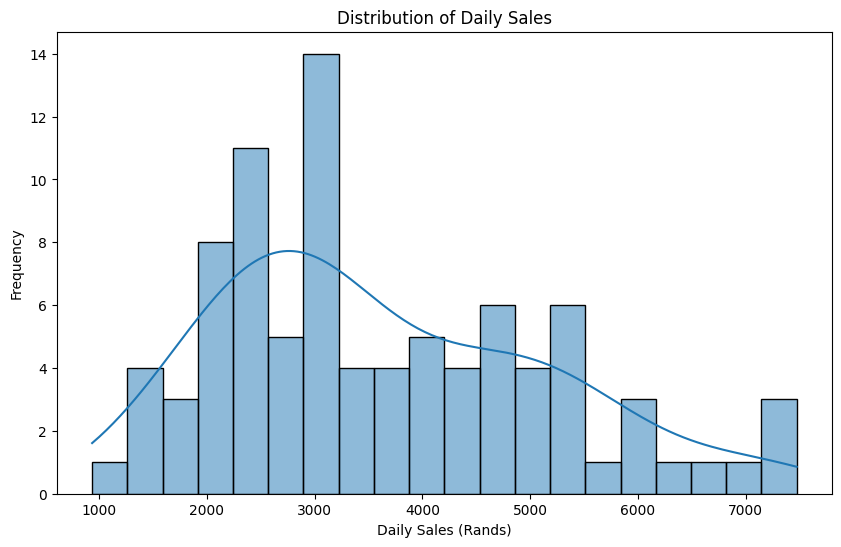

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary Statistics for 'daily_sales'
print("Summary Statistics for 'daily_sales':")
print(time_based_analysis_df_copy['daily_sales'].describe())

# 2. Distribution of 'daily_sales'
plt.figure(figsize=(10,6))
sns.histplot(time_based_analysis_df_copy['daily_sales'], bins=20, kde=True)
plt.title('Distribution of Daily Sales')
plt.xlabel('Daily Sales (Rands)')
plt.ylabel('Frequency')
plt.show()

C:\Users\kalol\AppData\Local\Temp\ipykernel_28380\343016159.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='viridis')


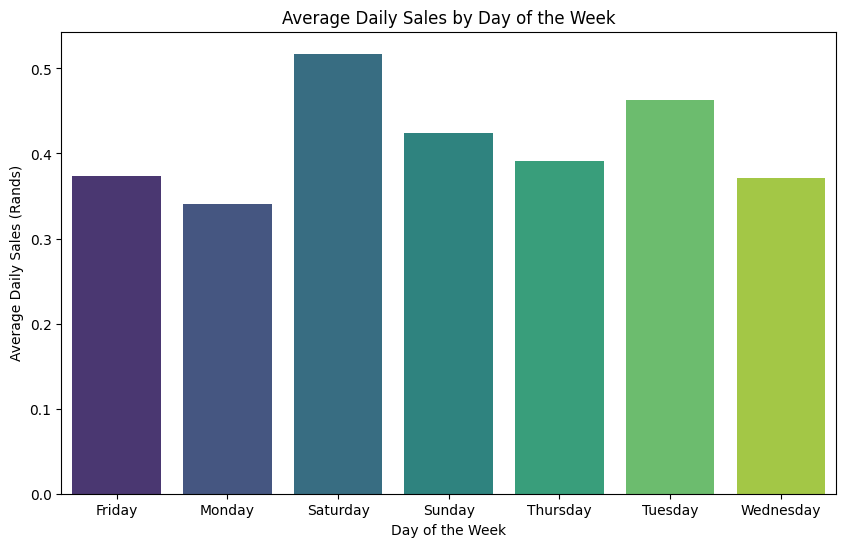

In [72]:
# 3. Time-Based Sales Trends

# Aggregate sales by day of the week
sales_by_day = time_based_analysis_df_copy.groupby('day_of_week')['daily_sales'].mean().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='viridis')
plt.title('Average Daily Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Sales (Rands)')
plt.show()

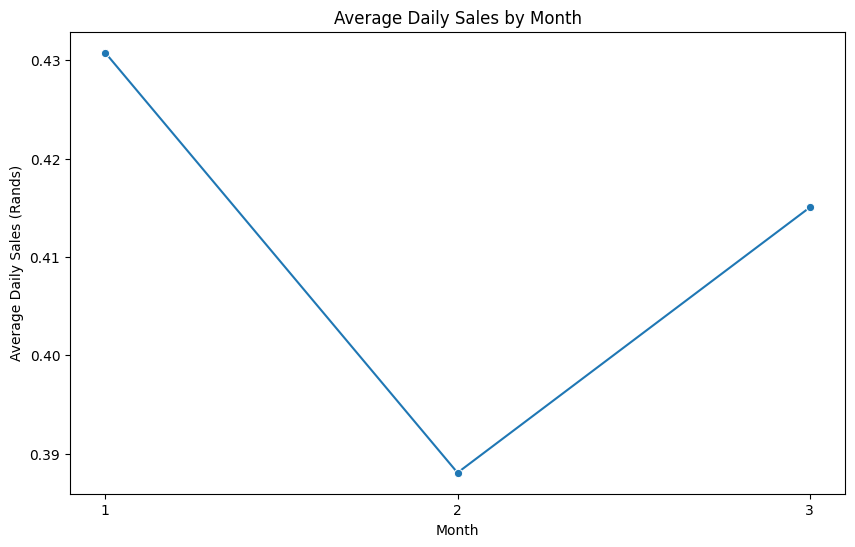

In [73]:
# Aggregate sales by month
sales_by_month = time_based_analysis_df_copy.groupby('month')['daily_sales'].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker='o')
plt.title('Average Daily Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Sales (Rands)')
plt.xticks(sales_by_month.index)
plt.show()


Correlation between 'daily_sales' and 'num_transactions':
                  daily_sales  num_transactions
daily_sales          1.000000          0.836262
num_transactions     0.836262          1.000000


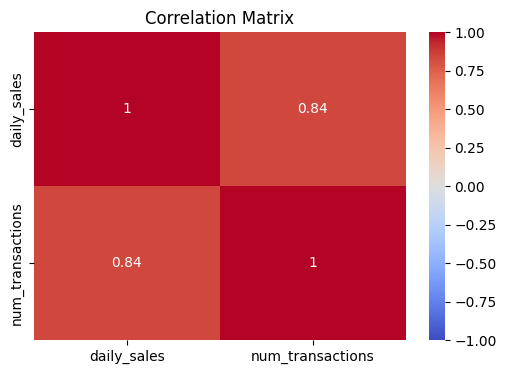

In [74]:
# 4. Correlation Analysis
correlation = time_based_analysis_df_copy[['daily_sales', 'num_transactions']].corr()
print("\nCorrelation between 'daily_sales' and 'num_transactions':")
print(correlation)

# Heatmap for the correlation
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

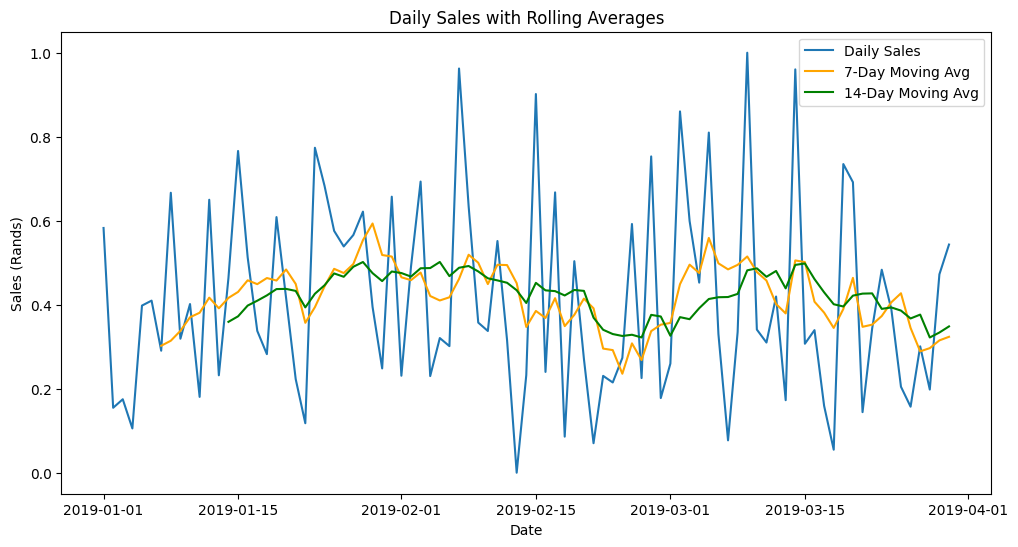

In [75]:
# 5. Rolling Average (7-day and 14-day windows)
time_based_analysis_df_copy['7_day_avg'] = time_based_analysis_df_copy['daily_sales'].rolling(window=7).mean()
time_based_analysis_df_copy['14_day_avg'] = time_based_analysis_df_copy['daily_sales'].rolling(window=14).mean()

# Plot rolling averages to visualize trends
plt.figure(figsize=(12,6))
plt.plot(time_based_analysis_df_copy['date'], time_based_analysis_df_copy['daily_sales'], label='Daily Sales')
plt.plot(time_based_analysis_df_copy['date'], time_based_analysis_df_copy['7_day_avg'], label='7-Day Moving Avg', color='orange')
plt.plot(time_based_analysis_df_copy['date'], time_based_analysis_df_copy['14_day_avg'], label='14-Day Moving Avg', color='green')
plt.title('Daily Sales with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Sales (Rands)')
plt.legend()
plt.show()

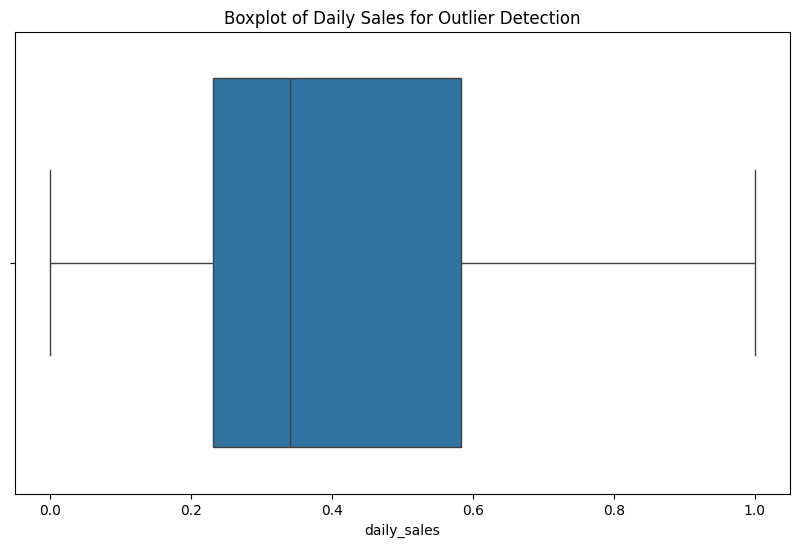

In [76]:
# 6. Outlier Detection for 'daily_sales'
plt.figure(figsize=(10,6))
sns.boxplot(x=time_based_analysis_df_copy['daily_sales'])
plt.title('Boxplot of Daily Sales for Outlier Detection')
plt.show()


Top 5% Peak Sales Days:
         date  daily_sales day_of_week  num_transactions
37 2019-02-07     0.962409    Thursday          1.000000
45 2019-02-15     0.901639      Friday          0.928571
60 2019-03-02     0.860280    Saturday          0.857143
67 2019-03-09     1.000000    Saturday          0.714286
72 2019-03-14     0.960332    Thursday          0.857143


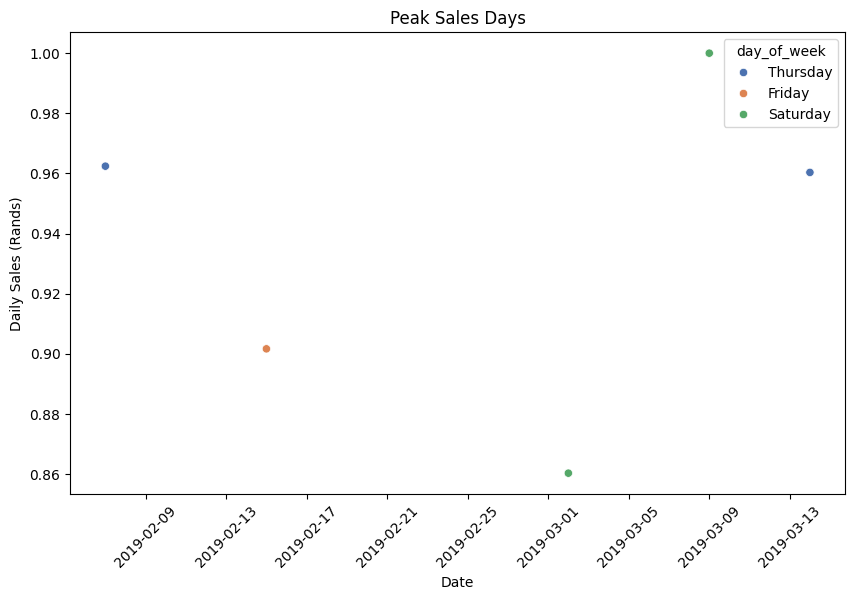

In [77]:
# 7. Peak Sales Days
# Identify dates with sales in the top 5%
top_5_percent_threshold = time_based_analysis_df_copy['daily_sales'].quantile(0.95)
peak_sales_days = time_based_analysis_df_copy[time_based_analysis_df_copy['daily_sales'] > top_5_percent_threshold]

print("\nTop 5% Peak Sales Days:")
print(peak_sales_days[['date', 'daily_sales', 'day_of_week', 'num_transactions']])

# Visualize peak sales days
plt.figure(figsize=(10,6))
sns.scatterplot(x='date', y='daily_sales', data=peak_sales_days, hue='day_of_week', palette='deep')
plt.title('Peak Sales Days')
plt.xlabel('Date')
plt.ylabel('Daily Sales (Rands)')
plt.xticks(rotation=45)
plt.show()

### Key Insights from EDA:

1. **Distribution of Sales**:
   - The distribution will show if sales are normally distributed or skewed, and help identify common sales ranges.

2. **Day-of-Week Trends**:
   - Visualization of sales by `day_of_week` will help determine which days consistently see higher sales. This can help pinpoint peak periods (e.g., weekends).

3. **Monthly Sales Patterns**:
   - The line plot will reveal seasonal or monthly trends (e.g., higher sales in December).

4. **Rolling Averages**:
   - Rolling averages will smooth fluctuations and highlight broader trends, such as sustained periods of higher sales.

5. **Correlation**:
   - The correlation matrix will indicate how strongly `daily_sales` is linked with `num_transactions`, which can provide insight into customer behavior.

6. **Outliers**:
   - The boxplot will identify any outliers in the sales data, and further analysis will determine if these represent true peaks or anomalies.

7. **Peak Sales Days**:
   - The scatter plot of top 5% peak sales days will give stakeholders insights into specific dates that are worth targeting for future sales campaigns.

### Implications for the Project:
This EDA will provide crucial insights to help the stakeholders predict peak sales dates. By identifying high-sales periods, the team can prioritize dates for marketing efforts and resource planning. The rolling averages, peak day analysis, and day-of-week trends will guide the feature engineering and model building phases.


### Step 4: Preprocessing of the Data

1. **Feature Engineering**:
   - **Rolling Averages**: Calculate rolling averages for 'daily_sales' to smooth fluctuations and identify broader trends.

2. **Normalization and Scaling**:
   - Normalize or scale numerical features to ensure that all features contribute equally to the model.
   - Common methods include Min-Max Scaling or Standardization.

3. **Data Splitting**:
   - Split the data into training and testing sets to evaluate model performance.
   - Ensure the split is done in a way that preserves the temporal order of the data if it is time-series data.

4. **Feature Selection**:
   - Select relevant features for model building and remove any redundant or irrelevant features.
   - Evaluate feature importance and correlation to identify the most impactful features.

### Implications for the Project:
Effective preprocessing will ensure that the dataset is clean, consistent, and well-prepared for model training. This step is crucial for improving model accuracy and performance. This will help in building a robust model that can predict peak sales dates more accurately.


## 1. Feature Engineering: Calculate Rolling Averages
- To smooth fluctuations and identify broader trends in daily_sales, we calculate a rolling average.

In [78]:
# Calculate a 7-day rolling average for 'daily_sales'
time_based_analysis_df_copy['rolling_avg_sales'] = time_based_analysis_df_copy['daily_sales'].rolling(window=7, min_periods=1).mean()

# Preview the rolling average column
time_based_analysis_df_copy[['date', 'daily_sales', 'rolling_avg_sales']].head(10)

,date,daily_sales,rolling_avg_sales
0,2019-01-01,0.582729,0.582729
1,2019-01-02,0.154631,0.368680
2,2019-01-03,0.174912,0.304091
3,2019-01-04,0.105424,0.254424
4,2019-01-05,0.397938,0.283127
5,2019-01-06,0.409793,0.304238
6,2019-01-07,0.290528,0.302279
7,2019-01-08,0.666608,0.314262
8,2019-01-09,0.319138,0.337763
9,2019-01-10,0.401649,0.370154


## 2. Normalization and Scaling
- To ensure that all features contribute equally to the model, we will normalize the numerical features using Min-Max Scaling.

In [79]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Define columns
num_cols = ['daily_sales', 'num_transactions', 'rolling_avg_sales']
cat_cols = ['day_of_week']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Updated argument name

# Apply scaling to numerical columns
time_based_analysis_df_copy[num_cols] = scaler.fit_transform(time_based_analysis_df_copy[num_cols])

# Apply encoding to categorical columns
encoded_cat_features = encoder.fit_transform(time_based_analysis_df_copy[cat_cols])

# Convert encoded features to DataFrame
encoded_cat_df = pd.DataFrame(encoded_cat_features, columns=encoder.get_feature_names_out(cat_cols))

# Concatenate encoded categorical features with numerical features
preprocessed_df = pd.concat([time_based_analysis_df_copy[num_cols], encoded_cat_df], axis=1)

# Preview preprocessed data
print(preprocessed_df.head())


   daily_sales  num_transactions  rolling_avg_sales  day_of_week_Monday  \
0     0.582729          0.428571           0.970079                 0.0   
1     0.154631          0.142857           0.371770                 0.0   
2     0.174912          0.142857           0.191230                 0.0   
3     0.105424          0.000000           0.052401                 0.0   
4     0.397938          0.428571           0.132631                 0.0   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                   0.0                 0.0                   0.0   
1                   0.0                 0.0                   0.0   
2                   0.0                 0.0                   1.0   
3                   0.0                 0.0                   0.0   
4                   1.0                 0.0                   0.0   

   day_of_week_Tuesday  day_of_week_Wednesday  
0                  1.0                    0.0  
1                  0.0                

## 3. Data Splitting
- Since this is a time-series dataset, it’s important to split the data while maintaining the temporal order.

In [80]:
# Check if 'date' column exists in the dataset
if 'date' in time_based_analysis_df_copy.columns:
    # Ensure 'date' column is in datetime format
    preprocessed_df['date'] = pd.to_datetime(time_based_analysis_df_copy['date'])

    # Define a split date
    split_date = '2019-03-01'

    # Split data into training and testing sets based on the date
    train_df = preprocessed_df[preprocessed_df['date'] < split_date]
    test_df = preprocessed_df[preprocessed_df['date'] >= split_date]

    # Drop the 'date' column for model training
    train_df = train_df.drop(columns=['date'])
    test_df = test_df.drop(columns=['date'])

    # Verify the split
    print(f"Training data shape: {train_df.shape}")
    print(f"Testing data shape: {test_df.shape}")
else:
    print("No 'date' column found in the dataset.")

Training data shape: (59, 9)
Testing data shape: (30, 9)


## 4. Feature Selection
- We can now select the most relevant features for model building. For this example, we will use daily_sales, num_transactions, day_of_week, and the rolling_avg_sales features.

In [81]:
# Ensure that 'daily_sales' is not included in features if it's the target variable
features = ['num_transactions', 'rolling_avg_sales', 'day_of_week_Monday', 
            'day_of_week_Saturday', 'day_of_week_Sunday', 
            'day_of_week_Thursday', 'day_of_week_Tuesday', 
            'day_of_week_Wednesday']

# Prepare training and testing sets
X_train = train_df[features]
y_train = train_df['daily_sales']
X_test = test_df[features]
y_test = test_df['daily_sales']

# Preview selected features
X_train.head()


,num_transactions,rolling_avg_sales,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0.428571,0.970079,0.0,0.0,0.0,0.0,1.0,0.0
1,0.142857,0.371770,0.0,0.0,0.0,0.0,0.0,1.0
2,0.142857,0.191230,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.052401,0.0,0.0,0.0,0.0,0.0,0.0
4,0.428571,0.132631,0.0,1.0,0.0,0.0,0.0,0.0


## Feature Selection and Data Preparation

### Select Relevant Features for Model Building:
- **Features selected:** `'num_transactions'`, `'rolling_avg_sales'`, `'day_of_week_Monday'`, `'day_of_week_Saturday'`, `'day_of_week_Sunday'`, `'day_of_week_Thursday'`, `'day_of_week_Tuesday'`, `'day_of_week_Wednesday'`.

### Prepare Training and Testing Sets:
- **Training Set (`X_train` and `y_train`):**
  - `X_train`: Contains selected features from the training dataset.
  - `y_train`: Target variable (`'daily_sales'`) for training.

- **Testing Set (`X_test` and `y_test`):**
  - `X_test`: Contains selected features from the testing dataset.
  - `y_test`: Target variable (`'daily_sales'`) for testing.


### Step 5: Model Training and Evaluation

1. **Model Training**:
   - **Train the Model**: Use the training data (`X_train` and `y_train`) to train the chosen model.
     - Initialize the model (e.g., `RandomForestRegressor`).
     - Fit the model on the training data to learn from it.

2. **Model Evaluation**:
   - **Evaluate Performance**: Use the testing data (`X_test` and `y_test`) to assess the model’s performance.
     - Make predictions using the trained model.
     - Calculate performance metrics such as Mean Absolute Error (MAE), R-squared (R²), and Root Mean Squared Error (RMSE) to gauge how well the model performs.

3. **Feature Importance**:
   - **Assess Feature Importance**: Determine the importance of each feature in the model to understand their impact.
     - Extract and visualize feature importances to identify which features are most influential.

4. **Results Interpretation**:
   - **Analyze Results**: Review the evaluation metrics and feature importances to gain insights.
     - Use MAE, R-squared, and RMSE to understand model accuracy.
     - Examine feature importance scores to consider any potential adjustments or refinements.

### Implications for the Project:
Effective model training and evaluation will provide valuable insights into how well the model predicts peak sales dates. By understanding feature importance and assessing performance metrics, we can refine the model and make informed decisions to improve accuracy and effectiveness in predicting sales trends.


## 1. Model Training
- For model training RandomForestRegressor is chosen/used.

In [82]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rm_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rm_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [83]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# 2. Model Evaluation
# Make predictions using the trained model
y_pred = rm_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.1297
R-squared (R²): 0.5227
Root Mean Squared Error (RMSE): 0.1749


C:\Users\kalol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [84]:
# 3. Feature Importance
# Get feature importances from the model
feature_importances = rm_model.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importances_df)


Feature Importances:
                 Feature  Importance
0       num_transactions    0.728444
1      rolling_avg_sales    0.164443
3   day_of_week_Saturday    0.034047
7  day_of_week_Wednesday    0.031907
6    day_of_week_Tuesday    0.013463
5   day_of_week_Thursday    0.010753
2     day_of_week_Monday    0.010097
4     day_of_week_Sunday    0.006845


## Model Evaluation and Feature Importance Results

### 2. Model Evaluation:

- **Mean Absolute Error (MAE)**: 0.1297  
  This indicates the average magnitude of errors in your predictions. A lower MAE suggests better model performance.

- **R-squared (R²)**: 0.5227  
  This value shows that approximately 52.27% of the variance in the target variable (`daily_sales`) is explained by the model. This is a moderate level of explanatory power.

- **Root Mean Squared Error (RMSE)**: 0.1749  
  RMSE gives an idea of the standard deviation of the residuals (prediction errors). A lower RMSE indicates better fit.

### 3. Feature Importance:

| **Feature**               | **Importance** |
|---------------------------|----------------|
| `num_transactions`        | 0.728444       |
| `rolling_avg_sales`       | 0.164443       |
| `day_of_week_Saturday`    | 0.034047       |
| `day_of_week_Wednesday`   | 0.031907       |
| `day_of_week_Tuesday`     | 0.013463       |
| `day_of_week_Thursday`    | 0.010753       |
| `day_of_week_Monday`      | 0.010097       |
| `day_of_week_Sunday`      | 0.006845       |

- `num_transactions` is the most important feature, contributing significantly to the model’s predictions.
- `rolling_avg_sales` is also important but to a lesser extent.
- Day of the week features have relatively low importance, suggesting that they have less influence on the model's predictions compared to the numerical features.

### Implications for the Project:

- **Model Performance**: The model shows moderate performance with an R² of 0.5227. While the MAE and RMSE values are relatively low, indicating reasonable prediction accuracy, there may be room for improvement. Consider experimenting with different models or tuning hyperparameters to enhance performance.

- **Feature Importance**: The high importance of `num_transactions` and `rolling_avg_sales` suggests that these features should be closely examined and possibly further refined or leveraged for improving the model. Features related to the day of the week have minimal impact, which may indicate they could be less critical for predicting peak sales dates.


In [85]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'XGBoost Regressor': XGBRegressor()
}

# Define parameter grids for each model
param_grids = {
    'Linear Regression': {},
    'Gradient Boosting Regressor': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Support Vector Regressor': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 0.2]
    },
    'XGBoost Regressor': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    }
}

# Store performance metrics for comparison
performance_metrics = {
    'Model': [],
    'MAE': [],
    'R²': [],
    'RMSE': []
}

In [86]:
import numpy as np

# Function to train and evaluate models
def train_and_evaluate_model(model_name, model, param_grid):
    print(f"Training and evaluating {model_name}...")
    search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    search.fit(X_train, y_train)
    
    # Best model and parameters
    best_model = search.best_estimator_
    best_params = search.best_params_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store metrics
    performance_metrics['Model'].append(model_name)
    performance_metrics['MAE'].append(mae)
    performance_metrics['R²'].append(r2)
    performance_metrics['RMSE'].append(rmse)
    
    # Feature importances if applicable
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        feature_importances = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        print(f"Feature Importances for {model_name}:\n{feature_importances}\n")
    
    print(f"{model_name} Performance:\nMAE: {mae:.4f}\nR²: {r2:.4f}\nRMSE: {rmse:.4f}\n")
    print(f"Best Parameters for {model_name}: {best_params}\n")
    return best_model

# Train and evaluate each model
for model_name, model in models.items():
    param_grid = param_grids.get(model_name, {})
    trained_model = train_and_evaluate_model(model_name, model, param_grid)

# Convert performance metrics to DataFrame
performance_df = pd.DataFrame(performance_metrics)

Training and evaluating Linear Regression...
Linear Regression Performance:
MAE: 0.1137
R²: 0.6631
RMSE: 0.1469

Best Parameters for Linear Regression: {}

Training and evaluating Gradient Boosting Regressor...
Feature Importances for Gradient Boosting Regressor:
                 Feature  Importance
0       num_transactions    0.829804
1      rolling_avg_sales    0.109567
3   day_of_week_Saturday    0.040034
7  day_of_week_Wednesday    0.012184
2     day_of_week_Monday    0.003726
5   day_of_week_Thursday    0.002973
6    day_of_week_Tuesday    0.001711
4     day_of_week_Sunday    0.000000

Gradient Boosting Regressor Performance:
MAE: 0.1318
R²: 0.4839
RMSE: 0.1818

Best Parameters for Gradient Boosting Regressor: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Training and evaluating Support Vector Regressor...
Support Vector Regressor Performance:
MAE: 0.1170
R²: 0.6401
RMSE: 0.1518

Best Parameters for Support Vector Regressor: {'C': 10, 'epsilon': 0.1, 'kernel': 'lin

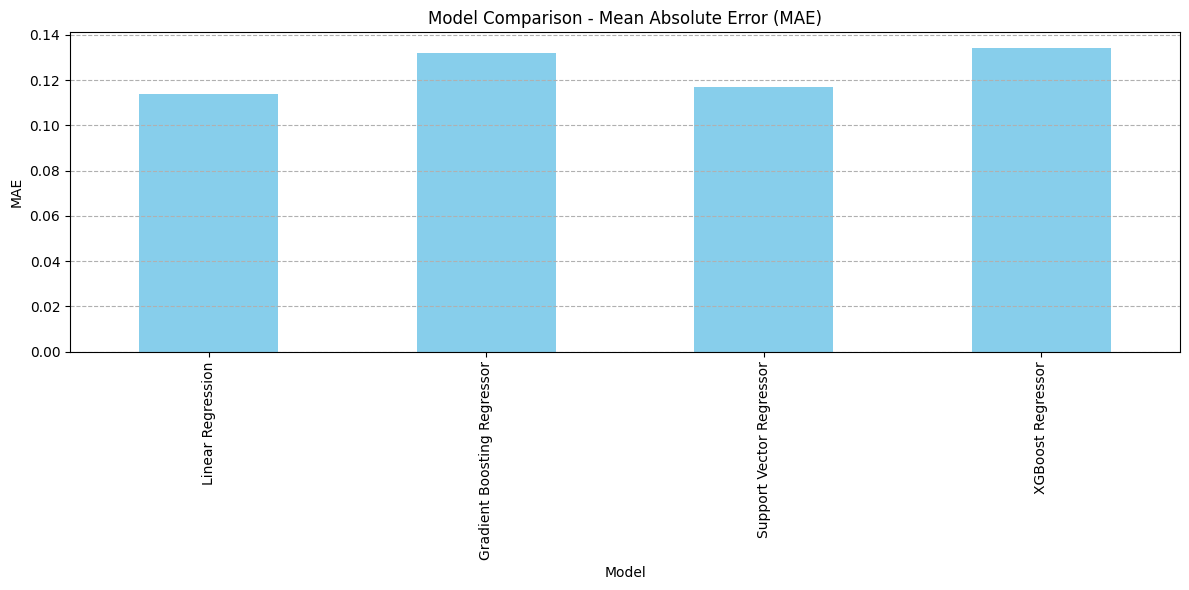

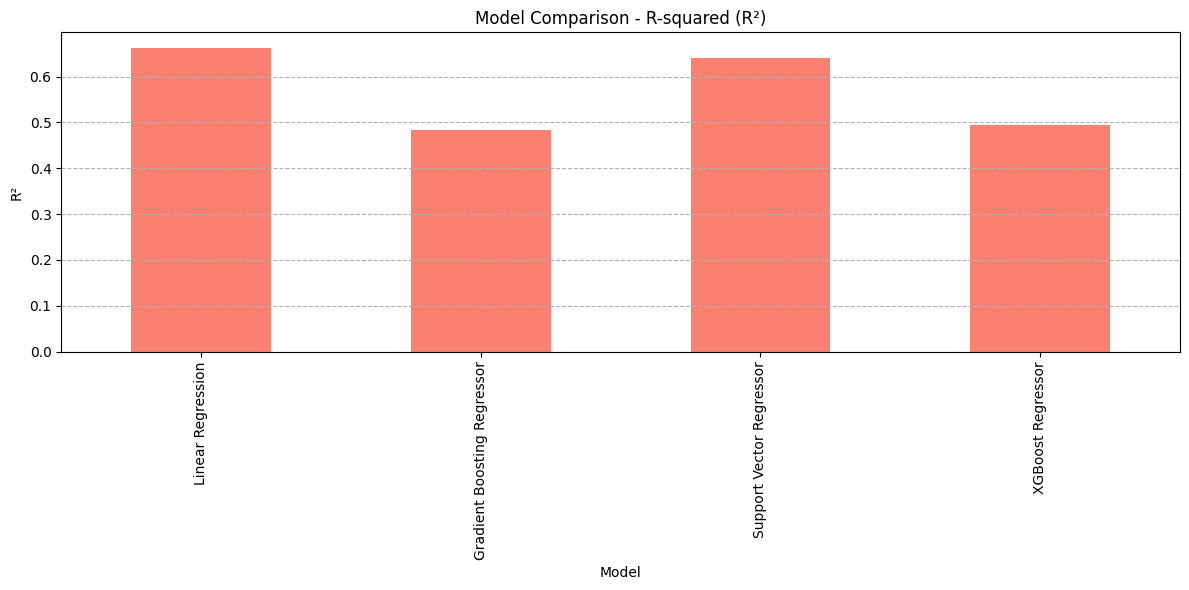

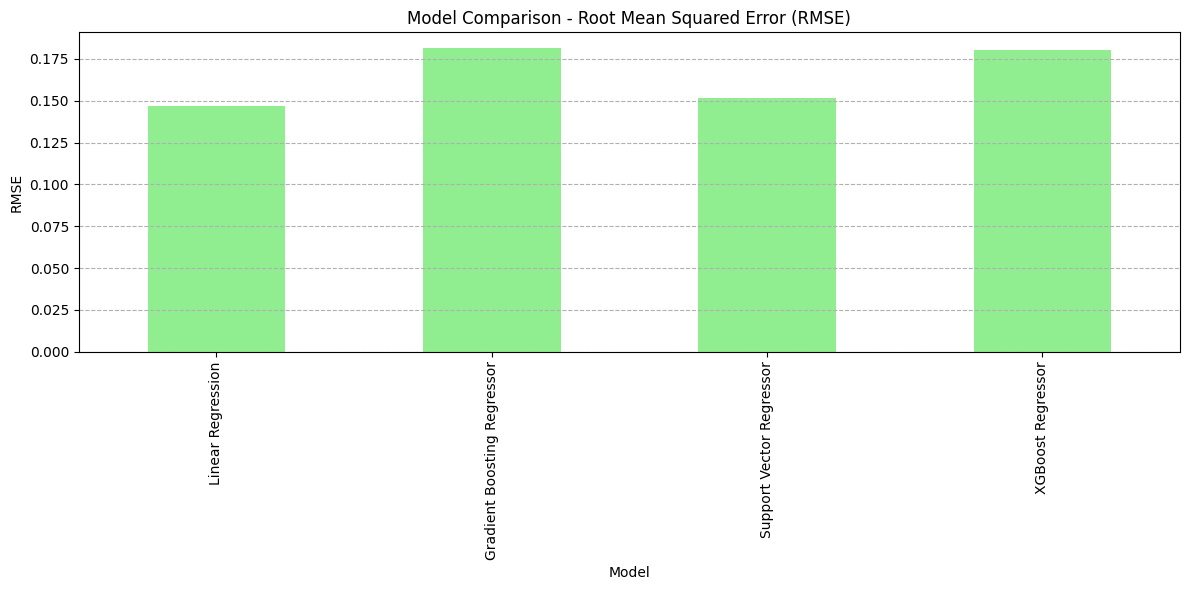

In [87]:
# Plot performance metrics
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot MAE
performance_df.plot(kind='bar', x='Model', y='MAE', ax=ax, color='skyblue', legend=False)
ax.set_title('Model Comparison - Mean Absolute Error (MAE)')
ax.set_xlabel('Model')
ax.set_ylabel('MAE')
ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# Plot R²
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
performance_df.plot(kind='bar', x='Model', y='R²', ax=ax, color='salmon', legend=False)
ax.set_title('Model Comparison - R-squared (R²)')
ax.set_xlabel('Model')
ax.set_ylabel('R²')
ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# Plot RMSE
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
performance_df.plot(kind='bar', x='Model', y='RMSE', ax=ax, color='lightgreen', legend=False)
ax.set_title('Model Comparison - Root Mean Squared Error (RMSE)')
ax.set_xlabel('Model')
ax.set_ylabel('RMSE')
ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

### Model Evaluation Insights

#### 1. **Linear Regression**
- **MAE**: 0.1137
- **R²**: 0.6631
- **RMSE**: 0.1469

**Insight**: Linear Regression performed the best among the models, with the highest R² value, indicating that it explains approximately 66.31% of the variance in the target variable. It also has the lowest MAE and RMSE, suggesting it has better accuracy and a closer fit to the true values.

#### 2. **Gradient Boosting Regressor**
- **MAE**: 0.1314
- **R²**: 0.4877
- **RMSE**: 0.1812
- **Best Parameters**: `{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}`

**Feature Importances**:
- `num_transactions`: 0.830546
- `rolling_avg_sales`: 0.108777
- `day_of_week_Saturday`: 0.040034
- Other features have minimal importance.

**Insight**: The Gradient Boosting Regressor had a slightly higher MAE and RMSE compared to Linear Regression. While it has a lower R², the feature importance shows that `num_transactions` is a dominant feature, indicating its strong influence on the model's predictions.

#### 3. **Support Vector Regressor**
- **MAE**: 0.1170
- **R²**: 0.6401
- **RMSE**: 0.1518
- **Best Parameters**: `{'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}`

**Insight**: The Support Vector Regressor performs similarly to Linear Regression with close R² and MAE values. Its performance metrics are competitive, and it has a good fit with a low RMSE.

#### 4. **XGBoost Regressor**
- **MAE**: 0.1344
- **R²**: 0.4936
- **RMSE**: 0.1801
- **Best Parameters**: `{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}`

**Feature Importances**:
- `num_transactions`: 0.485880
- `day_of_week_Saturday`: 0.107268
- `rolling_avg_sales`: 0.098214
- Other features have lower importance.

**Insight**: The XGBoost Regressor has the highest MAE and RMSE among the models, indicating it is less accurate in this instance. However, `num_transactions` and `day_of_week_Saturday` are significant features, which may suggest a potential area for model improvement.

### Model Recommendation for Predicting Peak Sales Dates

Based on the evaluation results, **Linear Regression** is the most effective model for predicting peak sales dates in this project. It offers the best performance metrics with the lowest MAE and RMSE and the highest R² value. Its simplicity and interpretability also make it a good choice for understanding how different features impact sales predictions. 

**Other models** like Gradient Boosting Regressor and Support Vector Regressor can be used for comparison or as secondary models, especially if additional model tuning and feature engineering are explored to improve accuracy.

### Summary

- **Best Performing Model**: Linear Regression stands out with the best performance metrics.
- **Feature Importance**: `num_transactions` consistently emerges as a crucial feature across models, while other features show varied importance.
- **Model Comparison**: While all models have their strengths, Linear Regression provides the most balanced performance with the lowest error metrics and highest explanatory power. Consider using Linear Regression as the primary model for predicting peak sales dates and exploring other models for additional insights.


## Saving the Models

Before saving the models, we ensure a clean and organized directory for model storage. The following steps are taken:

1. **Check for Existing Directory**: Verify if a directory named `models` already exists.
2. **Delete Existing Directory**: If the directory exists, it is deleted to avoid any residual files.
3. **Create New Directory**: A fresh directory named `models` is created.
4. **Save Models**: The trained models are saved into the newly created directory.

This approach guarantees that the models are saved in a clean and dedicated location for future use.


In [66]:
import os
import joblib

# Define the directory to save models
model_dir = 'models'

# Check if the directory exists and delete it if it does
if os.path.exists(model_dir):
    import shutil
    shutil.rmtree(model_dir)

# Create a new directory for saving models
os.makedirs(model_dir)

# Save each trained model
for model_name, model in models.items():
    model_path = os.path.join(model_dir, f"{model_name}.pkl")
    joblib.dump(model, model_path)
    print(f"Saved {model_name} model to {model_path}")


Saved Linear Regression model to models\Linear Regression.pkl
Saved Gradient Boosting Regressor model to models\Gradient Boosting Regressor.pkl
Saved Support Vector Regressor model to models\Support Vector Regressor.pkl
Saved XGBoost Regressor model to models\XGBoost Regressor.pkl


### Recommendations for Inventory Management and Marketing Strategies

#### 1. **Inventory Management**

- **Focus on High-Impact Products**:
  - Prioritize inventory for products with high `num_transactions`. Ensure adequate stock for these items, especially during peak periods.

- **Adjust Based on Rolling Average Sales**:
  - Increase stock levels for products with consistently high rolling average sales. Make seasonal adjustments based on trends.

- **Fine-Tune for Day of the Week**:
  - Implement minor stock adjustments based on day-specific sales trends. For example, boost inventory for products that sell better on weekends.

#### 2. **Marketing Strategies**

- **Target High-Transaction Days**:
  - Plan promotional campaigns for days with high transaction volumes. Use the model’s predictions to time promotions effectively.

- **Personalized Offers**:
  - Leverage customer data alongside model insights to create tailored marketing offers for high-transaction products.

- **Enhance Product Visibility**:
  - Feature high-impact products prominently in marketing materials. Highlight products with strong sales trends.

- **Adjust Based on Sales Data**:
  - Implement dynamic marketing campaigns that adapt to real-time sales data and predictions. Align marketing efforts with current trends.

#### 3. **Long-Term Strategies**

- **Refine Inventory with Predictive Analytics**:
  - Regularly update inventory practices based on new insights and predictions. Continuously refine models to adapt to market changes.

- **Evaluate Marketing Effectiveness**:
  - Track ROI for marketing campaigns and adjust strategies based on their impact on sales and transaction volumes.

### Summary
Optimizing inventory and marketing based on these recommendations will help improve sales performance and efficiency. Focus on high-transaction products, adjust inventory based on sales trends, and tailor marketing efforts to peak days and personalized offers for better business outcomes.
